In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import deepgraph as dg
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

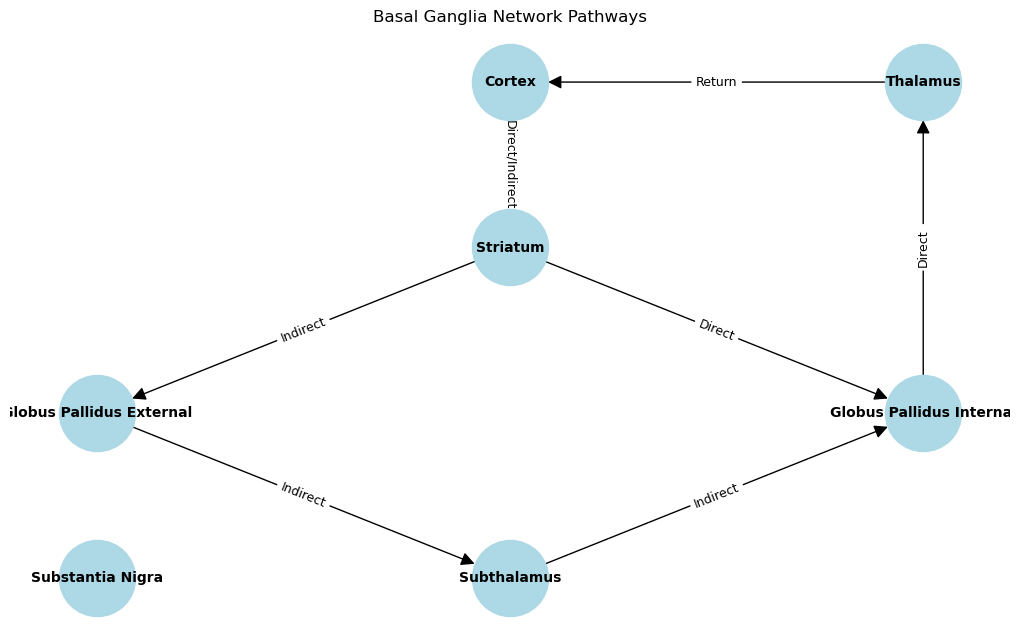

In [2]:
# Create a directed graph
G = nx.DiGraph()

# Define nodes and their layers
nodes = {
    'Cortex': (0, 3),
    'Striatum': (0, 2),
    'Globus Pallidus Internal': (1, 1),
    'Globus Pallidus External': (-1, 1),
    'Subthalamus': (0, 0),
    'Thalamus': (1, 3),
    'Substantia Nigra': (-1, 0)
}

# Add nodes to the graph
G.add_nodes_from(nodes.keys())

# Define edges for the pathways
edges = [
    # Direct Pathway
    ('Cortex', 'Striatum'),
    ('Striatum', 'Globus Pallidus Internal'),
    ('Globus Pallidus Internal', 'Thalamus'),
    ('Thalamus', 'Cortex'),

    # Indirect Pathway
    ('Striatum', 'Globus Pallidus External'),
    ('Globus Pallidus External', 'Subthalamus'),
    ('Subthalamus', 'Globus Pallidus Internal')
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nodes  # Position layout

nx.draw(
    G, pos,
    with_labels=True,
    node_size=3000,
    node_color='lightblue',
    font_size=10,
    font_weight='bold',
    arrowsize=20,
    edge_color='black'
)

# Draw edge labels to show pathway types
edge_labels = {
    ('Cortex', 'Striatum'): 'Direct/Indirect',
    ('Striatum', 'Globus Pallidus Internal'): 'Direct',
    ('Globus Pallidus Internal', 'Thalamus'): 'Direct',
    ('Thalamus', 'Cortex'): 'Return',

    ('Striatum', 'Globus Pallidus External'): 'Indirect',
    ('Globus Pallidus External', 'Subthalamus'): 'Indirect',
    ('Subthalamus', 'Globus Pallidus Internal'): 'Indirect'
}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title('Basal Ganglia Network Pathways')
plt.show()


In [1]:
import plotly.graph_objects as go

# 뉴런 그룹 (열)
labels = ["CTX", "FSN", "MSN D1", "MSN D2", "GPe", "STN", "SNr"]

# 연결 관계 (출발지와 목적지의 인덱스, 연결 강도)
# 출발지: source, 목적지: target, 연결 강도: value
source = [0, 1, 1, 2, 2, 3, 4, 5]  # 출발 뉴런 그룹 인덱스
target = [1, 2, 3, 3, 4, 5, 5, 6]  # 연결된 뉴런 그룹 인덱스
value =  [8, 10, 6, 4, 7, 5, 3, 6]  # 연결 강도 (가중치)

# Sankey Diagram 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,  # 뉴런 그룹 라벨
        color="blue"   # 노드 색상
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(31, 119, 180, 0.5)"  # 링크 색상 및 투명도
    )
))

fig.update_layout(title_text="Neural Network Connectivity", font_size=12)
fig.show()


In [4]:
import plotly.graph_objects as go

labels = ["CTX", "FSN"]

source = [0, 1] 
target = [1, 2]  
value =  [8, 16]  

# Sankey Diagram 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,  
        color="blue"  
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(31, 119, 180, 0.5)"  
    )
))

fig.update_layout(title_text="Neural Network Connectivity", font_size=12)
fig.show()


In [2]:
labels = ["CTX1", "CTX2", "CTX3", "FSN1", "FSN2", "FSN3"]

source = [
    0, 0, 0,  
    1, 1, 1, 
    2, 2, 2   
]

target = [
    3, 4, 5,  
    4, 3, 5,  
    5, 3, 4   
]

value = [
    8, 5, 3,   
    8, 5, 3,  
    8, 5, 3  
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue", "blue", "blue", "red", "red", "red"], 
        x=[0.1, 0.1, 0.1, 0.9, 0.9, 0.9], 
        y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9], 
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
               "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",
               "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)"]
    )
))

fig.show()

In [1]:
labels = [
    "CTX1", "CTX2", "CTX3",  
    "FSN1 (CTX1)", "FSN1 (CTX2)", "FSN1 (CTX3)", 
    "FSN2 (CTX1)", "FSN2 (CTX2)", "FSN2 (CTX3)",
    "FSN3 (CTX1)", "FSN3 (CTX2)", "FSN3 (CTX3)"  
]

source = [
    0, 0, 0,  
    1, 1, 1,
    2, 2, 2   
]

target = [
    3, 6, 9,  
    4, 7, 10, 
    5, 8, 11  
]

value = [
    8, 5, 3, 
    8, 5, 3,  
    8, 5, 3  
]

link_colors = [
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",         
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)"    
]

# Sankey 다이어그램
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=[
            "blue", "blue", "blue",  
            "rgba(31, 119, 180, 0.8)", "rgba(255, 0, 0, 0.8)", "rgba(50, 205, 50, 0.8)",  
            "rgba(31, 119, 180, 0.5)", "rgba(255, 0, 0, 0.5)", "rgba(50, 205, 50, 0.5)",  
            "rgba(31, 119, 180, 0.3)", "rgba(255, 0, 0, 0.3)", "rgba(50, 205, 50, 0.3)"  
        ]
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.show()

In [6]:
labels = [
    "CTX1", "CTX2", "CTX3",  
    "FSN (CTX1)", "MSN D1 (CTX1)", "MSN D2 (CTX1)",  
    "FSN (CTX2)", "MSN D1 (CTX2)", "MSN D2 (CTX2)",  
    "FSN (CTX3)", "MSN D1 (CTX3)", "MSN D2 (CTX3)",  
    "STN1", "STN2", "STN3"  
]

source = [
    0, 0, 0,  
    1, 1, 1,  
    2, 2, 2  
]

source += [
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11  
]

target = [
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11,  
    12, 12, 12,  
    13, 13, 13,  
    14, 14, 14  
]

value = [
    8, 5, 3,  
    8, 5, 3,  
    8, 5, 3,  
    4, 2, 1,  
    4, 2, 1,  
    4, 2, 1  
]

link_colors = [
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)", "rgba(31, 119, 180, 0.2)",  
    "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)", "rgba(255, 0, 0, 0.2)",          
    "rgba(50, 205, 50, 0.6)", "rgba(50, 205, 50, 0.4)", "rgba(50, 205, 50, 0.2)"     
]

node_colors = [
    "blue", "blue", "blue",  
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "purple", "purple", "purple"  
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.show()

In [8]:
labels = [
    "CTX1", "CTX2", "CTX3",  
    "FSN (CTX1)", "MSN D1 (CTX1)", "MSN D2 (CTX1)",  
    "FSN (CTX2)", "MSN D1 (CTX2)", "MSN D2 (CTX2)",  
    "FSN (CTX3)", "MSN D1 (CTX3)", "MSN D2 (CTX3)",  
    "STN1", "STN2", "STN3"  
]

source = [
    0, 0, 0,  
    1, 1, 1,  
    2, 2, 2   
]

target = [
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11 
]

source += [
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11 
]

target += [
    12, 12, 12,  
    13, 13, 13,  
    14, 14, 14   
]

value = [
    8, 5, 3,  
    8, 5, 3,  
    8, 5, 3,  
    4, 2, 1,  
    4, 2, 1,  
    4, 2, 1   
]

link_colors = [
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)", "rgba(31, 119, 180, 0.2)",  
    "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)", "rgba(255, 0, 0, 0.2)",          
    "rgba(50, 205, 50, 0.6)", "rgba(50, 205, 50, 0.4)", "rgba(50, 205, 50, 0.2)"     
]

node_colors = [
    "blue", "blue", "blue",
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "rgba(31, 119, 180, 0.6)", "rgba(255, 0, 0, 0.6)", "rgba(50, 205, 50, 0.6)"      
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.show()


In [9]:
### CTX - Striatum - GPe - STN - SNr

labels = [
    "CTX1", "CTX2", "CTX3",  
    "FSN (CTX1)", "MSN D1 (CTX1)", "MSN D2 (CTX1)",  
    "FSN (CTX2)", "MSN D1 (CTX2)", "MSN D2 (CTX2)",  
    "FSN (CTX3)", "MSN D1 (CTX3)", "MSN D2 (CTX3)",  
    "STN1", "STN2", "STN3",  
    "SNr1", "SNr2", "SNr3"  
]

source = [
    0, 0, 0,  
    1, 1, 1,  
    2, 2, 2,  
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11,  
    12, 13, 14,  
    12, 13, 14,  
    12, 13, 14   
]

target = [
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11,  
    12, 12, 12,  
    13, 13, 13,  
    14, 14, 14,  
    15, 15, 15,  
    16, 16, 16,  
    17, 17, 17   
]

value = [
    8, 5, 3,  
    8, 5, 3,  
    8, 5, 3,  
    4, 2, 1,  
    4, 2, 1,  
    4, 2, 1,  
    3, 3, 3,  
    2, 2, 2,  
    1, 1, 1   
]

link_colors = [
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)", "rgba(31, 119, 180, 0.2)",  
    "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)", "rgba(255, 0, 0, 0.2)",          
    "rgba(50, 205, 50, 0.6)", "rgba(50, 205, 50, 0.4)", "rgba(50, 205, 50, 0.2)",    
    "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)", "rgba(31, 119, 180, 0.2)",  
    "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)", "rgba(255, 0, 0, 0.2)",          
    "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)", "rgba(50, 205, 50, 0.2)"     
]

node_colors = [
    "blue", "blue", "blue",  
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "rgba(31, 119, 180, 0.6)", "rgba(255, 0, 0, 0.6)", "rgba(50, 205, 50, 0.6)",     
    "rgba(31, 119, 180, 0.5)", "rgba(255, 0, 0, 0.5)", "rgba(50, 205, 50, 0.5)"      
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.show()


In [17]:
### CTX - Striatum - SNr
import plotly.graph_objects as go

labels = [
    "CTX1", "CTX2", "CTX3",  
    "FSN (CTX1)", "MSN D1 (CTX1)", "MSN D2 (CTX1)",  
    "FSN (CTX2)", "MSN D1 (CTX2)", "MSN D2 (CTX2)",  
    "FSN (CTX3)", "MSN D1 (CTX3)", "MSN D2 (CTX3)",  
    "SNr1", "SNr2", "SNr3"
]

source = [
    0, 0, 0,  
    1, 1, 1,  
    2, 2, 2,  
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11
]

source += [
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11 
]

target = [
    3, 4, 5,  
    6, 7, 8,  
    9, 10, 11,  
    12, 12, 12,  
    13, 13, 13,  
    14, 14, 14
]

value = [
    8, 5, 3,  
    8, 5, 3,  
    8, 5, 3,  
    4, 2, 1,  
    4, 2, 1,  
    4, 2, 1
]

link_colors = [
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)", "rgba(31, 119, 180, 0.2)",  
    "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)", "rgba(255, 0, 0, 0.2)",          
    "rgba(50, 205, 50, 0.6)", "rgba(50, 205, 50, 0.4)", "rgba(50, 205, 50, 0.2)",    
    "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)", "rgba(31, 119, 180, 0.2)",  
    "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)", "rgba(255, 0, 0, 0.2)",          
    "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)", "rgba(50, 205, 50, 0.2)"     
]

node_colors = [
    "blue", "blue", "blue",  
    "rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",  
    "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",          
    "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)",    
    "rgba(31, 119, 180, 0.6)", "rgba(255, 0, 0, 0.6)", "rgba(50, 205, 50, 0.6)",     
    "rgba(31, 119, 180, 0.5)", "rgba(255, 0, 0, 0.5)", "rgba(50, 205, 50, 0.5)",      
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.show()


In [15]:
### CTX - STN - SNr
import plotly.graph_objects as go

labels = [
    "CTX1", "CTX2", "CTX3",  
    "STN1", "STN2", "STN3",  
    "SNr1", "SNr2", "SNr3"
]

source = [
    0, 1, 2,  
    3, 4, 5
]

target = [
    3, 4, 5,  
    6, 7, 8
]

value = [
    8, 5, 3,  
    4, 3, 2
]

link_colors = [
    "rgba(31, 119, 180, 0.8)", "rgba(255, 0, 0, 0.8)", "rgba(50, 205, 50, 0.8)",  
    "rgba(31, 119, 180, 0.6)", "rgba(255, 0, 0, 0.6)", "rgba(50, 205, 50, 0.6)"
]

node_colors = [
    "blue", "blue", "blue",  
    "rgba(31, 119, 180, 0.8)", "rgba(255, 0, 0, 0.8)", "rgba(50, 205, 50, 0.8)",  
    "rgba(31, 119, 180, 0.6)", "rgba(255, 0, 0, 0.6)", "rgba(50, 205, 50, 0.6)"
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.show()
